In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Groceries_dataset.csv to Groceries_dataset (5).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import time

%matplotlib inline
plt.style.use('bmh'); sns.set()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("Groceries_dataset.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day
df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-108-85bc65781e4f>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['year'] = pd.to_datetime(df['Date']).dt.year
<ipython-input-108-85bc65781e4f>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['Date']).dt.month
<ipython-input-108-85bc65781e4f>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=Tru

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,05-01-2015,whole milk,2015,1,5,0
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,01-02-2015,whole milk,2015,2,1,6
...,...,...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,10,8,2
38761,2022,23-02-2014,candy,2014,2,23,6
38762,1097,16-04-2014,cake bar,2014,4,16,2
38763,1510,03-12-2014,fruit/vegetable juice,2014,12,3,2


# Preprocessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int32 
 4   month            38765 non-null  int32 
 5   day              38765 non-null  int32 
 6   day_of_week      38765 non-null  int32 
dtypes: int32(4), int64(1), object(2)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


759

In [ ]:
df = df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['Date'] = df['Date'].astype('datetime64[ns]')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-115-4c13160fd12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype('category')
<ipython-input-115-4c13160fd12e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   year             38006 non-null  int32         
 4   month            38006 non-null  category      
 5   day              38006 non-null  int32         
 6   day_of_week      38006 non-null  category      
dtypes: category(2), datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['Date'].isnull().sum())

0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['month'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[7, 1, 9, 12, 2, ..., 4, 8, 11, 6, 10]
Length: 12
Categories (12, int32): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [ ]:
df['month'] = df['month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-119-984bd27e9b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [ ]:
df['month'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


month
August       3431
May          3348
January      3250
July         3240
June         3207
October      3203
April        3194
November     3193
March        3055
September    3002
December     2957
February     2926
Name: count, dtype: int64

In [ ]:
df['day_of_week'] = df['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-231ed25b3c98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['day_of_week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})


In [ ]:
df['day_of_week'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_of_week
Thursday     5510
Wednesday    5470
Friday       5451
Saturday     5444
Tuesday      5433
Sunday       5420
Monday       5278
Name: count, dtype: int64

In [ ]:
def group_week(week):
    if week < 9:
        return "Week 1"
    elif week > 8 and week < 16:
        return "Week 2"
    elif week > 15 and week < 23:
        return "Week 3"
    elif week > 22 and week < 31:
        return "Week 4"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['day'] = df['day'].apply(group_week)
order = ['Week 1','Week 2','Week 3','Week 4']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-124-ff9426ed359f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['day'].apply(group_week)


In [ ]:
df['day'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day
Week 1    10067
Week 4     9961
Week 2     8751
Week 3     8572
Name: count, dtype: int64

In [ ]:
df['itemDescription'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,July,Week 3,Tuesday
1,2552,2015-01-05,whole milk,2015,January,Week 1,Monday
2,2300,2015-09-19,pip fruit,2015,September,Week 3,Saturday
3,1187,2015-12-12,other vegetables,2015,December,Week 2,Saturday
4,3037,2015-02-01,whole milk,2015,February,Week 1,Sunday
...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,2014,October,Week 1,Wednesday
38761,2022,2014-02-23,candy,2014,February,Week 4,Sunday
38762,1097,2014-04-16,cake bar,2014,April,Week 3,Wednesday
38763,1510,2014-12-03,fruit/vegetable juice,2014,December,Week 1,Wednesday


In [ ]:
df['itemcategory'] = df['itemDescription'].replace({'tropical fruit':'fruit','whole milk':'dairy product','pip fruit':'fruit','other vegetables':'vegetables',
                                                'rolls/buns':'grain product','pot plants':'household product','citrus fruit':'fruit','frankfurter':'meat','beef':'meat',
                                                'chicken':'meat','butter':'dairy product','fruit/vegetable juice':'beverage','packaged fruit/vegetables':'fruit',
                                                'chocolate':'dessert','specialty bar':'dessert','butter milk':'dairy product','bottled water':'beverage',
                                                'yogurt':'dairy product','sausage':'meat','brown bread':'grain product','hamburger meat':'meat',
                                                'root vegetables':'vegetables','pork':'meat','pastry':'grain product','canned beer':'alcoholic beverage',
                                                'berries':'fruit','coffee':'beverage','misc. beverages':'beverage','ham':'meat','turkey':'meat',
                                                'curd cheese':'dairy product','red/blush wine':'alcoholic beverage','frozen potato products':'vegetables',
                                                'flour':'grain product','frozen meals':'food','herbs':'vegetables','soda':'beverage','detergent':'cleansing product',
                                                'grapes':'fruit','processed cheese':'dairy product','fish':'meat','sparkling wine':'alcoholic beverage',
                                                'newspapers':'paper','curd':'dairy product','pasta':'food','popcorn':'food','finished products':'food',
                                                'beverages':'beverage','bottled beer':'alcoholic beverage','dog food':'pet needs','specialty chocolate':'dessert',
                                                'condensed milk':'dairy product','cleaner':'cleansing product','white wine':'alcoholic beverage','ice cream':'dessert',
                                                'hard cheese':'dairy product','cream cheese ':'dairy product','liquor':'alcoholic beverage','pickled vegetables':'vegetables',
                                                'liquor (appetizer)':'alcoholic beverage','UHT-milk':'dairy product','candy':'sweets','sugar':'sweets','onions':'vegetables',
                                                'hair spray':'cosmetics','photo/film':'household product','domestic eggs':'dairy product','margarine':'dairy product',
                                                'shopping bags':'plastic','salt':'condiment','oil':'condiment','whipped/sour cream':'dairy product',
                                                'frozen vegetables':'vegetables','sliced cheese':'dairy product','dish cleaner':'cleansing product',
                                                'baking powder':'condiment','specialty cheese':'dairy product','salty snack':'food','Instant food products':'food',
                                                'pet care':'pet needs','white bread':'grain product','female sanitary products':'cleansing product',
                                                'cling film/bags':'plastic','soap':'cleansing product','frozen chicken':'meat','house keeping products':'cleansing product',
                                                'spread cheese':'dairy product','decalcifier':'cleansing product','frozen dessert':'dessert','vinegar':'condiment',
                                                'nuts/prunes':'fruit','potato products':'vegetables','frozen fish':'meat','hygiene articles':'paper',
                                                'artif. sweetener':'sweets','light bulbs':'household product','canned vegetables':'vegetables',
                                                'chewing gum':'sweets','canned fish':'meat','cookware':'household product','semi-finished bread':'dairy product',
                                                'cat food':'pet needs','bathroom cleaner':'cleansing product','prosecco':'alcoholic beverage','liver loaf':'meat',
                                                'zwieback':'grain product','canned fruit':'fruit','frozen fruits':'fruit','brandy':'alcoholic beverage',
                                                'baby cosmetics':'cosmetics','spices':'condiment','napkins':'household product','waffles':'dessert',
                                                'sauces':'condiment','rum':'alcoholic beverage','chocolate marshmallow':'dessert','long life bakery product':'grain product',
                                                'bags':'plastic','sweet spreads':'sweets','soups':'food','mustard':'condiment','specialty fat':'dessert',
                                                'instant coffee':'beverage','snack products':'food','organic sausage':'food','soft cheese':'dairy product',
                                                'mayonnaise':'condiment','dental care':'cosmetics','roll products ':'household product','kitchen towels':'household product',
                                                'flower soil/fertilizer':'household product','cereals':'grain product','meat spreads':'meat','dishes':'food',
                                                'male cosmetics':'cosmetics','candles':'household product','whisky':'alcoholic beverage','tidbits':'dessert',
                                                'cooking chocolate':'dessert','seasonal products':'condiment','liqueur':'alcoholic beverage',
                                                'abrasive cleaner':'cleansing product','syrup':'beverage','ketchup':'condiment','cream':'dairy product',
                                                'skin care':'cosmetics','rubbing alcohol':'cleansing product','nut snack':'food','cocoa drinks':'beverage',
                                                'softener':'cleansing product','organic products':'vegetables','cake bar':'dessert','honey':'sweets',
                                                'jam':'sweets','kitchen utensil':'household product','flower (seeds)':'household product','rice':'grain product',
                                                'tea':'beverage','salad dressing':'condiment','specialty vegetables':'vegetables','pudding powder':'dessert',
                                                'ready soups':'food','make up remover':'cosmetics','toilet cleaner':'cleansing product',
                                                'preservation products':'cleansing product'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-128-b85ad6213cb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['itemcategory'] = df['itemDescription'].replace({'tropical fruit':'fruit','whole milk':'dairy product','pip fruit':'fruit','other vegetables':'vegetables',


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week,itemcategory
0,1808,2015-07-21,tropical fruit,2015,July,Week 3,Tuesday,fruit
1,2552,2015-01-05,whole milk,2015,January,Week 1,Monday,dairy product
2,2300,2015-09-19,pip fruit,2015,September,Week 3,Saturday,fruit
3,1187,2015-12-12,other vegetables,2015,December,Week 2,Saturday,vegetables
4,3037,2015-02-01,whole milk,2015,February,Week 1,Sunday,dairy product
...,...,...,...,...,...,...,...,...
38760,4471,2014-10-08,sliced cheese,2014,October,Week 1,Wednesday,dairy product
38761,2022,2014-02-23,candy,2014,February,Week 4,Sunday,sweets
38762,1097,2014-04-16,cake bar,2014,April,Week 3,Wednesday,dessert
38763,1510,2014-12-03,fruit/vegetable juice,2014,December,Week 1,Wednesday,beverage


In [ ]:
df['itemcategory'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['fruit', 'dairy product', 'vegetables', 'grain product',
       'household product', 'meat', 'beverage', 'dessert',
       'alcoholic beverage', 'sweets', 'food', 'cleansing product',
       'paper', 'pet needs', 'cosmetics', 'plastic', 'condiment'],
      dtype=object)

In [ ]:
df['itemcategory'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemcategory
dairy product         8509
meat                  4199
vegetables            4080
beverage              3950
grain product         3907
fruit                 3277
alcoholic beverage    2034
dessert               1985
food                  1094
condiment              879
household product      837
sweets                 804
plastic                790
paper                  787
cleansing product      438
pet needs              329
cosmetics              107
Name: count, dtype: int64

# DATA EXPLORATION AND VISUALIZATION

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-132-7cd1bd25578d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='month', data=df, palette='hls', order=sorted_months, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)


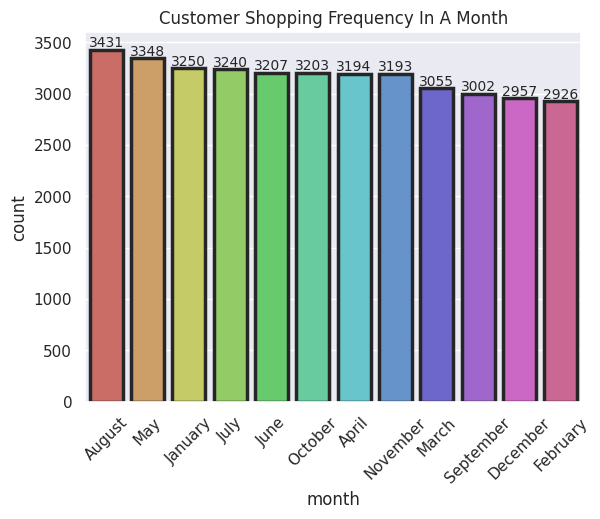

In [ ]:
sorted_months = df['month'].value_counts().index

# Create the countplot with sorted order and gap between bars
ax = sns.countplot(x='month', data=df, palette='hls', order=sorted_months, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of the bars with decreased font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.title('Customer Shopping Frequency In A Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-133-d18f46040e68>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='day', data=df, palette='hls', order=sorted_weeks, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)


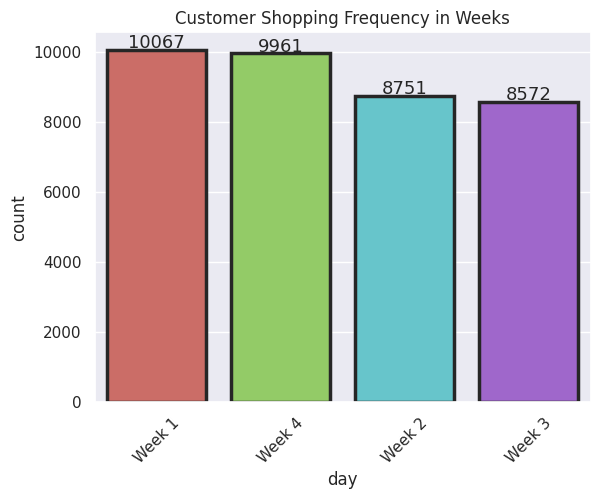

In [ ]:
sorted_weeks = df['day'].value_counts().index

# Create the countplot with sorted order and gap between bars
ax = sns.countplot(x='day', data=df, palette='hls', order=sorted_weeks, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of the bars with decreased font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=13)

plt.title('Customer Shopping Frequency in Weeks')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-134-442138d6f2ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='day_of_week', data=df, palette='hls', order=sorted_days, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)


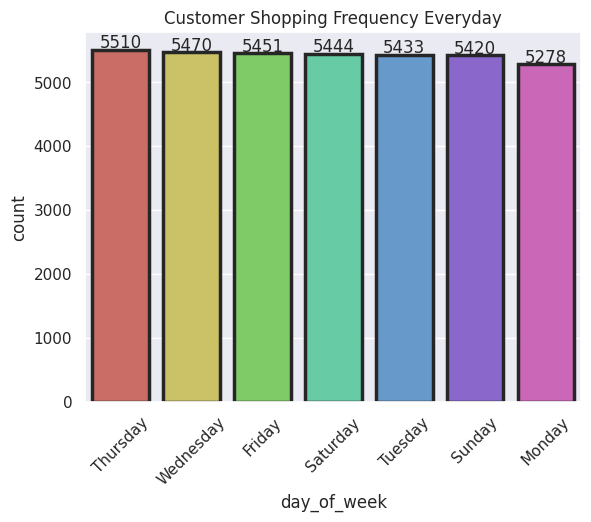

In [ ]:
sorted_days = df['day_of_week'].value_counts().index

# Create the countplot with sorted order and gap between bars
ax = sns.countplot(x='day_of_week', data=df, palette='hls', order=sorted_days, linewidth=2.5, edgecolor=".15", saturation=0.75, dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of the bars with decreased font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

plt.title('Customer Shopping Frequency Everyday')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-135-40e95f49b3f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_items.index, y=top_items.values, palette='hls')


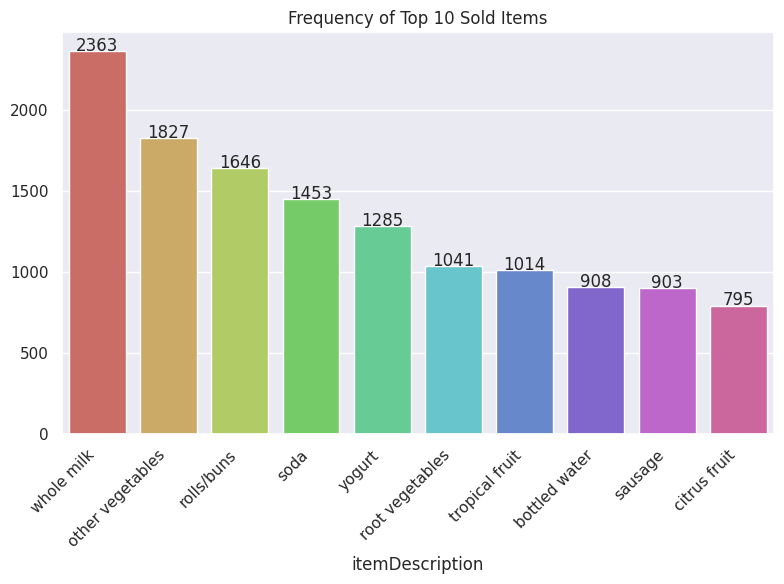

In [ ]:
# Get the top 10 most frequent item descriptions
top_items = df['itemDescription'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_items.index, y=top_items.values, palette='hls')

# Sort the bars in descending order
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Frequency of Top 10 Sold Items')

# Add values on top of the bars
for index, value in enumerate(top_items.values):
    ax.text(index, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-136-7c27ba342aeb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_categories.index, y=top_categories.values, palette='hls')
<ipython-input-136-7c27ba342aeb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


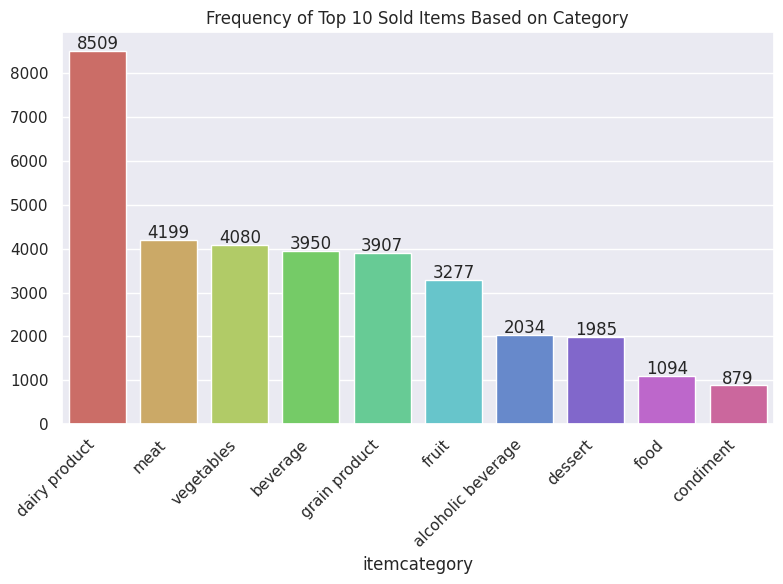

In [ ]:
# Get the top 10 most frequent item categories
top_categories = df['itemcategory'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_categories.index, y=top_categories.values, palette='hls')

# Sort the bars in descending order
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Frequency of Top 10 Sold Items Based on Category')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   year             38006 non-null  int32         
 4   month            38006 non-null  category      
 5   day              37351 non-null  object        
 6   day_of_week      38006 non-null  category      
 7   itemcategory     38006 non-null  object        
 8   date             38006 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 2.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-137-b4f584225f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['Date'])


In [ ]:
df_date = df.set_index(['Date'])
df_date

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,itemDescription,year,month,day,day_of_week,itemcategory,date
Date,,,,,,,,
2015-07-21,1808,tropical fruit,2015,July,Week 3,Tuesday,fruit,2015-07-21
2015-01-05,2552,whole milk,2015,January,Week 1,Monday,dairy product,2015-01-05
2015-09-19,2300,pip fruit,2015,September,Week 3,Saturday,fruit,2015-09-19
2015-12-12,1187,other vegetables,2015,December,Week 2,Saturday,vegetables,2015-12-12
2015-02-01,3037,whole milk,2015,February,Week 1,Sunday,dairy product,2015-02-01
...,...,...,...,...,...,...,...,...
2014-10-08,4471,sliced cheese,2014,October,Week 1,Wednesday,dairy product,2014-10-08
2014-02-23,2022,candy,2014,February,Week 4,Sunday,sweets,2014-02-23
2014-04-16,1097,cake bar,2014,April,Week 3,Wednesday,dessert,2014-04-16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

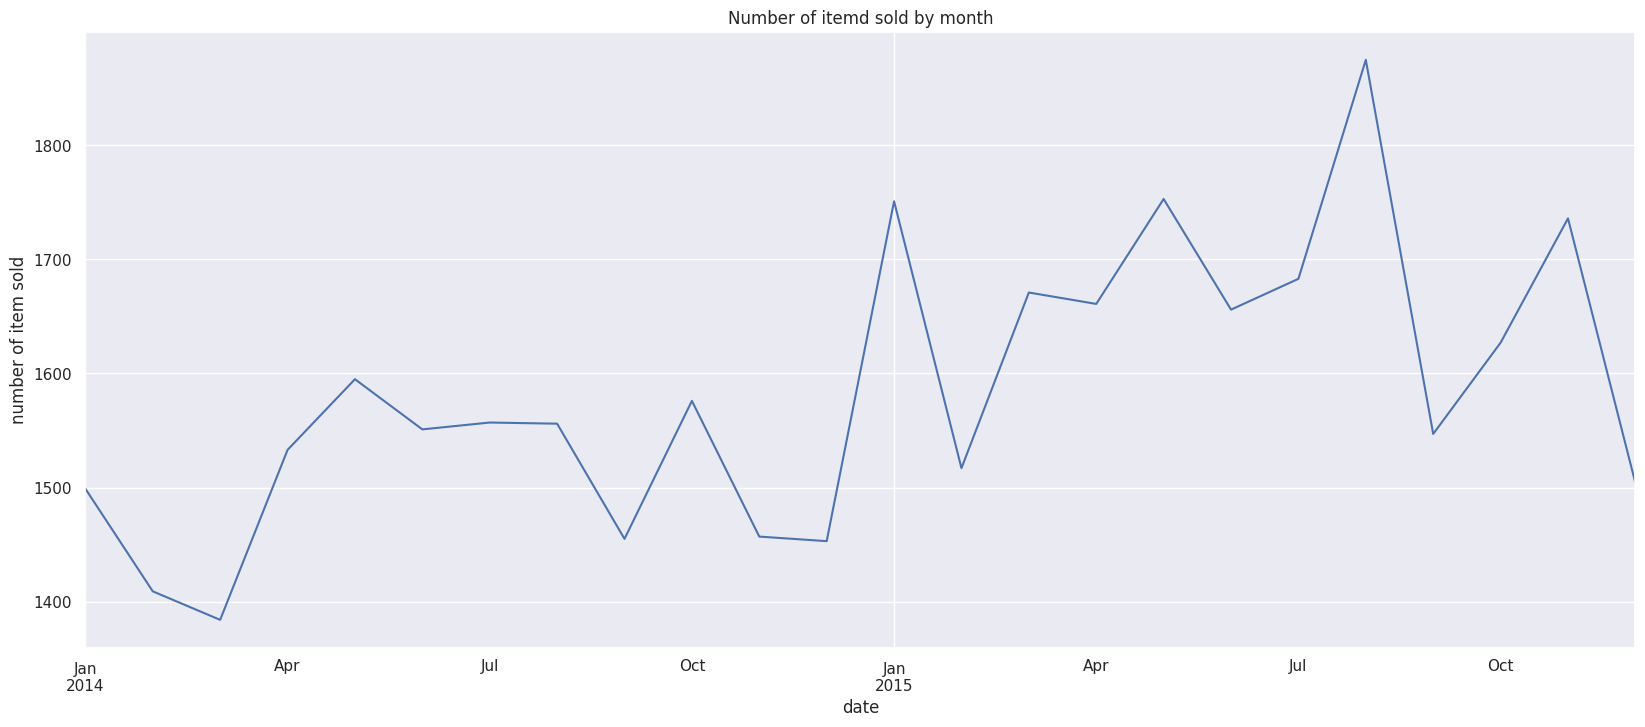

In [ ]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8),grid = True, title = "Number of itemd sold by month").set(xlabel = 'date',ylabel= 'number of item sold')

# Market Basket Analysis

In [ ]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number",ascending = False)
cust_level['itemDescription'] = cust_level["itemDescription"].str.strip()
cust_level

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,itemDescription
3578,5000,soda
27877,5000,onions
25489,5000,other vegetables
19727,5000,root vegetables
9340,5000,bottled beer
...,...,...
1629,1000,soda
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
! pip install apyori
from apyori import apriori
rules = apriori(transactions, min_support=0.002, min_confidence = 0.05, min_lift=3, min_length=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = list(rules)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
def inspect(results):
  antecedent = [tuple(result[2][0][0])[0] for result in results]
  consequent = [tuple(result[2][0][1])[0] for result in results]
  supports = [result[1] for result in results]
  confidences = [result[2][0][2] for result in results]
  lifts = [result[2][0][3] for result in results]
  return list(zip(antecedent,consequent, supports, confidences, lifts))
resultindatafram = pd.DataFrame(inspect(results),columns = ['Antecedent','Consequent','Support','Confidence','Lift'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
resultindatafram.nlargest(n=5,columns = 'Support')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Antecedent,Consequent,Support,Confidence,Lift
906,bottled water,soda,0.006414,0.152439,3.229388
2440,pork,tropical fruit,0.006157,0.134831,3.020535
3727,rolls/buns,shopping bags,0.005900,0.110577,3.341309
4845,root vegetables,yogurt,0.005900,0.172932,3.179671
1109,curd,canned beer,0.005387,0.269231,3.086652
